<a href="https://colab.research.google.com/github/YASH-25/Mahine-Learning/blob/main/CAT3_2147237.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Dataset Provided: Wines Dataset**

# Apply MLP and Logistic Regression for given dataset to perform classification for variable number of samples. The code should also include relevant plot/image to visualize the obtained results. Provide conceptual interpretation of the results. Also demonstrate if regression is suitable. Compare with atleast 5 different evaluation measures.

In [ ]:
import numpy as np
import pandas as pd 
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn import linear_model
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import plot_confusion_matrix

**Importing th dataset and reading it**

In [ ]:
df = pd.read_csv("/content/wines.csv - wines.csv.csv")
for i in df.columns:
  if i != "Class":
    df[i] = df[i]  / df[i].abs().max()

In [ ]:
df.head()

,Alcholol,Malic acid,Ash,Alcanity,Magnesium,Total Phenol,Flavanoids,N Phenols,Proanthocyanins,Color Intensity,Hue,OD280/OD315,Proline,Class
0,0.959541,0.294828,0.752322,0.520000,0.783951,0.721649,0.602362,0.424242,0.639665,0.433846,0.608187,0.9800,0.633929,1
1,0.890088,0.306897,0.662539,0.373333,0.617284,0.682990,0.543307,0.393939,0.357542,0.336923,0.614035,0.8500,0.625000,1
2,0.887390,0.406897,0.826625,0.620000,0.623457,0.721649,0.637795,0.454545,0.784916,0.436923,0.602339,0.7925,0.705357,1
3,0.968982,0.336207,0.773994,0.560000,0.697531,0.992268,0.687008,0.363636,0.608939,0.600000,0.502924,0.8625,0.880952,1
4,0.892785,0.446552,0.888545,0.700000,0.728395,0.721649,0.529528,0.590909,0.508380,0.332308,0.608187,0.7325,0.437500,1


In [ ]:
x = df.iloc[:,:-1]

In [ ]:
x.head()

,Alcholol,Malic acid,Ash,Alcanity,Magnesium,Total Phenol,Flavanoids,N Phenols,Proanthocyanins,Color Intensity,Hue,OD280/OD315,Proline
0,0.959541,0.294828,0.752322,0.520000,0.783951,0.721649,0.602362,0.424242,0.639665,0.433846,0.608187,0.9800,0.633929
1,0.890088,0.306897,0.662539,0.373333,0.617284,0.682990,0.543307,0.393939,0.357542,0.336923,0.614035,0.8500,0.625000
2,0.887390,0.406897,0.826625,0.620000,0.623457,0.721649,0.637795,0.454545,0.784916,0.436923,0.602339,0.7925,0.705357
3,0.968982,0.336207,0.773994,0.560000,0.697531,0.992268,0.687008,0.363636,0.608939,0.600000,0.502924,0.8625,0.880952
4,0.892785,0.446552,0.888545,0.700000,0.728395,0.721649,0.529528,0.590909,0.508380,0.332308,0.608187,0.7325,0.437500


In [ ]:
y = df.iloc[:,-1:]

In [ ]:
y.head()

,Class
0,1
1,1
2,1
3,1
4,1


**Testing and Training the dataset by spliting it into different random states of X and Y**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=23)

## **APPLYING MLP TO THE DATASET**

In [ ]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(11,9,7), random_state = 1)

clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9322033898305084

In [ ]:
clf.score(X_test, y_test)

0.9322033898305084

In [ ]:
classes = df["Class"].unique()
for i in classes:
  classData = df.query("Class==@i")
  x = classData.iloc[:,:-1]
  temp = classData.iloc[:,-1:]
  predicted = list(clf.predict(x.iloc[0:, : ]))
  y = []
  for j in temp.values:
    y.append(j[0])
  total = len(y)
  
  correct = 0
  for j in range(total):
    if(y[j] == predicted[j]):
      correct += 1
  accuracy = correct/total * 100
  print("Accuracy for the class {0} = {1}".format(i, accuracy ))

Accuracy for the class 1 = 98.30508474576271
Accuracy for the class 2 = 81.69014084507043
Accuracy for the class 3 = 97.91666666666666


In [ ]:
classData = df.query("Class==1")
x = classData.iloc[:,:-1]
y = classData.iloc[:,-1:]
predicted = []

In [ ]:
clf.predict(df.iloc[62:63, : -1])

array([2])

# **LOGISTIC REGRESSION**

In [ ]:
from sklearn import linear_model
model = linear_model.LogisticRegression()

model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9830508474576272

In [ ]:
classes = df["Class"].unique()
for i in classes:
  classData = df.query("Class==@i")
  x = classData.iloc[:,:-1]
  temp = classData.iloc[:,-1:]
  predicted = list(logr.predict(x.iloc[0:, : ]))
  y = []
  for j in temp.values:
    y.append(j[0])
  total = len(y)
  
  correct = 0
  for j in range(total):
    if(y[j] == predicted[j]):
      correct += 1
  accuracy = correct/total * 100
  print("Accuracy for the class {0} = {1}".format(i, accuracy ))


Accuracy for the class 1 = 1.694915254237288
Accuracy for the class 2 = 98.59154929577466
Accuracy for the class 3 = 2.083333333333333


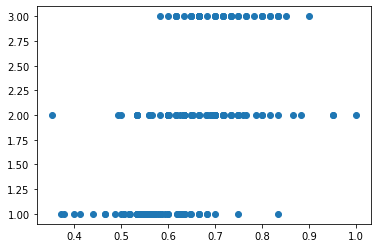

In [ ]:
plt.scatter(df["Alcanity"], df["Class"])

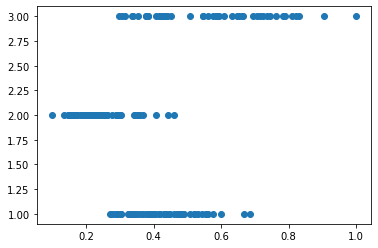

In [ ]:
plt.scatter(df["Color Intensity"], df["Class"])

# EVALUATION MEASURES

In [ ]:
clf.score(X_test, y_test) #accruacy of MLP

0.9322033898305084

In [ ]:
model.score(X_test, y_test) #accuracy of Logistic Regression

0.9830508474576272

In [ ]:
kfold = model_selection.KFold(n_splits=10, random_state=7, shuffle=True)

# LOG LOSS #it shows that how accuare prediction can be corresponding to its actual value

In [ ]:
scoring = 'neg_log_loss'
results = model_selection.cross_val_score(clf, X_train, y_train, cv=kfold, scoring=scoring)
print("Logloss: %.3f (%.3f)" % (results.mean(), results.std()))                               #LogLoss of   MLP

Logloss: -0.521 (0.079)


In [ ]:
scoring = 'neg_log_loss'
results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
print("Logloss: %.3f (%.3f)" % (results.mean(), results.std()))                                 #LogLoss of  Logistic Regression

Logloss: -0.367 (0.058)


# CONFUSION MATRIX

In [ ]:
y = y_test
predicted = clf.predict(X_test)
matrix = confusion_matrix(y, predicted)
print(matrix)                                 #CONFUSION MATRIX OF MLP

[[18  0  0]
 [ 3 22  1]
 [ 0  0 15]]


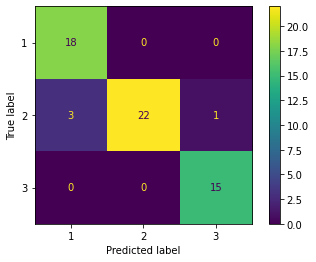

In [ ]:
plot_confusion_matrix(clf, X_test, y_test)

In [ ]:
y = y_test
predicted = model.predict(X_test)
matrix = confusion_matrix(y, predicted)
print(matrix)

[[18  0  0]
 [ 1 25  0]
 [ 0  0 15]]


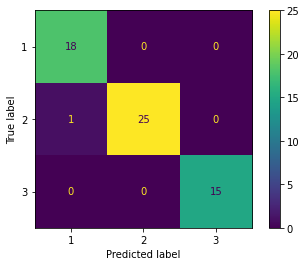

In [ ]:
plot_confusion_matrix(model, X_test, y_test)

# CLASSIFICATION REPORT

In [ ]:
y = y_test
predicted = clf.predict(X_test)
report = classification_report(y, predicted)
print(report)                                   #of MLP

              precision    recall  f1-score   support

           1       0.86      1.00      0.92        18
           2       1.00      0.85      0.92        26
           3       0.94      1.00      0.97        15

    accuracy                           0.93        59
   macro avg       0.93      0.95      0.94        59
weighted avg       0.94      0.93      0.93        59



In [ ]:
y = y_test
predicted = model.predict(X_test)
report = classification_report(y, predicted)
print(report)                                      #OF LOGISTIC REGRESSION

              precision    recall  f1-score   support

           1       0.95      1.00      0.97        18
           2       1.00      0.96      0.98        26
           3       1.00      1.00      1.00        15

    accuracy                           0.98        59
   macro avg       0.98      0.99      0.98        59
weighted avg       0.98      0.98      0.98        59



FOR MLP :- A MLP Classifier was trained with 13 input neurons, 3 output neurons and 3 hidden layers with 11, 9, 7 neurons respectively. It was found that the overall accuracy of the model was 93% and accuracy for each data class was as shown in the above cell. Class 2 was identified with the lowest accuracy of 81% while Class 1 was identified with highest accuracy of 98%

For Logistic Regression :- Logistic regression model was trained and the accuracy was found to be 98% and the Class 3 is overfitted since it is giving the 100% accuracy.